# Movie Profits Analysis 

## Overview

Microsoft has decided to create a movie studio and would like to do so in a profitable manner.  Descriptive analysis of boxoffice revenue, budget, ratings, and genres show that Animation, Adventure, and Scifi have the highest worldwide gross medians, followed by Action, Fantasy and Family.  However, Action's production budget median is higher than it's domestic gross median, making it a riskier investement.  In addition, Horror movies have the highest median return on investment.  Horror movies are cheap to make and tend to bring in high revenue in comparison to their budget.  Horror, Animation, and Adventure have the highest return on investment median's worldwide, followed by mystery, scifi, and family.  Action, Drama, and Adventure movies had the greatest number of reviewers.  Based on this information, I recommend focusing on Animation, Scifi, and Horror movies to begin with.  In addtion, budgets over 200 million have higher risk.  Therefore to begin with, keeping budgets under 200 million is ideal. 

## Business Problem

Microsoft want to create a profitable movie studio. They want to know what types of films are currently doing the best at the box office in order to decide what films they want to create. Using data from IMDB and The Numbers, I analayzed which genres perform best in the worldwide and domestic markets, which ones more people review, and which have the highest return on investmest. 

## Data Understanding

IMDB tracks movie titles, release year, length, and genres. They have several databases that link movies by ID. IMDB also allows users to rate movies, and keeps track of the average rating and number of reviewers per movie. 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [118]:
df_imdb_title = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [119]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [120]:
type(df_imdb_title['genres'])
df_imdb_title['genres'][0]
#genres is just one string, so need to seperate it based on comma

'Action,Crime,Drama'

In [121]:
#adds a column with a list of each genre the movie belongs to 
len(df_imdb_title['genres'].unique()) #1086
df_imdb_title['genres_list'] = df_imdb_title['genres'].str.split(',') #returns a list
df_imdb_title.head()    

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [122]:
df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [123]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The Numbers tracks release date, production budget, domestic gross, and worldwide gross for movies. 

In [124]:
tnmovie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [125]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

I make a list of each genre in the database and count how many movies each genre has. I check for missing values. I drop the columns of original title as unnecessary data, and runtime minutes as it has over 31,000 data points missing. 

I remove the following genres as they have few data points: Game-Show, Short, Talk-Show, News, Musical, and Adult

In [129]:
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [132]:
df_imdb_title['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Comedy,Romance,Western             1
Comedy,Sci-Fi,Sport                1
Adventure,Music,Mystery            1
Mystery,Reality-TV,Thriller        1
Adventure,Crime,Horror             1
Name: genres, Length: 1085, dtype: int64

In [133]:
#makes a list of all the genres. It starts out as a series, 
#then turns it into a list of all the genres. This will allow me to find
#each unique genre in the database 

genres_list =  df_imdb_title['genres'].str.split(',')
print(len(genres_list))
print(genres_list[0:5])

def flattenNestedList(nestedList):
    '''Converts a nested list to a flat list'''
    flatListofgenres = []
    #iterate over all the elements in given list
    for elem in nestedList:
        #check if type of element s list
        if isinstance(elem, list):
            #extend th flat list by adding contents of this list
            flatListofgenres.extend(flattenNestedList(elem))
        else:
            #append the element too the list
            flatListofgenres.append(elem)
    return flatListofgenres

flattened_genres_list = flattenNestedList(genres_list)
print(flattened_genres_list[0:5])

146144
0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object
['Action', 'Crime', 'Drama', 'Biography', 'Drama']


In [134]:
#makes a list of each genre in the database 
unique_genres = []
for x in flattened_genres_list:
    if pd.isnull(x):
        pass
    elif x not in unique_genres:
        unique_genres.append(x)
print(unique_genres)
type(unique_genres)
    

['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary', 'History', 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War', 'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News', 'Talk-Show', 'Reality-TV', 'Game-Show', 'Short']


list

In [135]:
df_imdb_title['genres'].isna().sum()
#checking number of titles with missing genre. 

5408

In [136]:
#counts the number of movies per genre 

def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

for genre in unique_genres:
    if type(genre) == str:
        count = countX(flattened_genres_list, genre)
        print(genre + str(count))

#delete Adult, talk-Show, Gam-Show, Shoort, and Reality-TV as count is below 100



Action10335
Crime6753
Drama49883
Biography8722
Comedy25312
Fantasy3516
Horror10805
Thriller11883
Adventure6465
Animation2799
Documentary51640
History6225
Mystery4659
Sci-Fi3365
Romance9372
Family6227
War1405
Music4314
Sport2234
Western467
Musical1430
Adult25
News1551
Talk-Show50
Reality-TV98
Game-Show4
Short11


In [137]:
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [138]:
#checking for missing values
df_imdb_title.isna().sum()
#columns to delete: original title (unnecessary), runtime minutes as too much missing data

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
genres_list         5408
dtype: int64

In [139]:
df_imdb_title = df_imdb_title.drop('runtime_minutes', axis=1)
df_imdb_title.isna().sum()

tconst               0
primary_title        0
original_title      21
start_year           0
genres            5408
genres_list       5408
dtype: int64

In [140]:
df_imdb_title.isna().sum()

tconst               0
primary_title        0
original_title      21
start_year           0
genres            5408
genres_list       5408
dtype: int64

In [141]:
len(df_imdb_title)

146144

In [142]:
#drop missing genres
df_imdb_title = df_imdb_title.dropna()
df_imdb_title.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
genres            0
genres_list       0
dtype: int64

In [143]:
df_imdb_title = df_imdb_title.drop('original_title', axis=1)
df_imdb_title.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
genres_list      0
dtype: int64

In [144]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [145]:
df_imdb_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [146]:
#checking for placeholders
for col in df_imdb_ratings:
    print('Values for {}: \n{}\n\n'.format(col, df_imdb_ratings[col].unique))

Values for tconst: 
<bound method Series.unique of 0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object>


Values for averagerating: 
<bound method Series.unique of 0        8.3
1        8.9
2        6.4
3        4.2
4        6.5
        ... 
73851    8.1
73852    7.5
73853    4.7
73854    7.0
73855    6.3
Name: averagerating, Length: 73856, dtype: float64>


Values for numvotes: 
<bound method Series.unique of 0           31
1          559
2           20
3        50352
4           21
         ...  
73851       25
73852       24
73853       14
73854        5
73855      128
Name: numvotes, Length: 73856, dtype: int64>




In [147]:
df_imdb_ratings = df_imdb_ratings.drop_duplicates('tconst')
len(df_imdb_ratings)


73856

Mean: 6.332728552859568
Median: 6.5


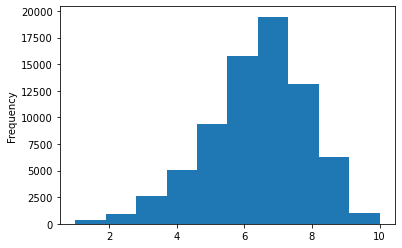

In [148]:
averagerating_mean = df_imdb_ratings['averagerating'].mean()
averagerating_median = df_imdb_ratings['averagerating'].median()
df_imdb_ratings['averagerating'].plot(kind='hist', bins=10)

print("Mean: {}".format(averagerating_mean))
print("Median: {}".format(averagerating_median))


In [149]:
df_imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Deleting entries with less than 100 reviewers

In [150]:
numvotes_mean = df_imdb_ratings['numvotes'].mean() #3523
numvotes_median = df_imdb_ratings['numvotes'].median() #49
print("Mean: {}".format(numvotes_mean))
print("Median: {}".format(numvotes_median))

#there's a massive difference between median and mean 

df_imdb_ratings_filtered = df_imdb_ratings[df_imdb_ratings['numvotes'] >= 100]
print(df_imdb_ratings_filtered['numvotes'].value_counts())
numvotesfil_mean = df_imdb_ratings_filtered['numvotes'].mean() #3523
numvotesfil_median = df_imdb_ratings_filtered['numvotes'].median() #49
#df_imdb_ratings['numvotes'].plot(kind='hist', bins=3)
print("Mean: {}".format(numvotesfil_mean)) #9008
print("Median: {}".format(numvotesfil_median)) #465 

Mean: 3523.6621669194105
Median: 49.0
104      128
109      119
102      118
107      109
105      106
        ... 
13487      1
19632      1
17585      1
5307       1
4098       1
Name: numvotes, Length: 7254, dtype: int64
Mean: 9008.149549612215
Median: 465.0


In [151]:
df_imdb_ratings_filtered.describe()

,averagerating,numvotes
count,28753.000000,2.875300e+04
mean,5.907015,9.008150e+03
std,1.356642,4.804270e+04
min,1.000000,1.000000e+02
25%,5.100000,2.020000e+02
50%,6.100000,4.650000e+02
75%,6.900000,1.663000e+03
max,9.900000,1.841066e+06


In [152]:
df_imdb_title.head()

,tconst,primary_title,start_year,genres,genres_list
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [153]:
# add column for each genre and make it true or false if that genre is there

#add column for genre and default to false
for genre in unique_genres: 
    df_imdb_title[genre] = False
    
for index_label, row_series in df_imdb_title.iterrows():
    for genre in df_imdb_title.at[index_label, 'genres_list']:
        df_imdb_title.at[index_label, genre] = True
df_imdb_title.head()
    
     

,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,Music,Sport,Western,Musical,Adult,News,Talk-Show,Reality-TV,Game-Show,Short
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]",True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]",False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [154]:
for genre in unique_genres: 
    print(df_imdb_title[genre].value_counts())



False    130399
True      10335
Name: Action, dtype: int64
False    133981
True       6753
Name: Crime, dtype: int64
False    90851
True     49883
Name: Drama, dtype: int64
False    132012
True       8722
Name: Biography, dtype: int64
False    115422
True      25312
Name: Comedy, dtype: int64
False    137218
True       3516
Name: Fantasy, dtype: int64
False    129929
True      10805
Name: Horror, dtype: int64
False    128851
True      11883
Name: Thriller, dtype: int64
False    134270
True       6464
Name: Adventure, dtype: int64
False    137935
True       2799
Name: Animation, dtype: int64
False    89094
True     51640
Name: Documentary, dtype: int64
False    134509
True       6225
Name: History, dtype: int64
False    136075
True       4659
Name: Mystery, dtype: int64
False    137369
True       3365
Name: Sci-Fi, dtype: int64
False    131363
True       9371
Name: Romance, dtype: int64
False    134507
True       6227
Name: Family, dtype: int64
False    139329
True       1405
Name: War,

In [155]:
df_imdb_title = df_imdb_title.drop('Game-Show', axis = 1)
df_imdb_title = df_imdb_title.drop('Short', axis = 1)
df_imdb_title = df_imdb_title.drop('Talk-Show', axis = 1)
df_imdb_title = df_imdb_title.drop('News', axis = 1)
df_imdb_title = df_imdb_title.drop('Musical', axis = 1)
df_imdb_title = df_imdb_title.drop('Adult', axis = 1)

#dropping genres without a ton of data






In [156]:
unique_genres.remove('Game-Show')
unique_genres.remove('Short')
unique_genres.remove('Talk-Show')
unique_genres.remove('News')
unique_genres.remove('Musical')
unique_genres.remove('Adult')

In [157]:
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [158]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [159]:
tnmovie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [160]:
#checking for placeholders
for col in tnmovie_budgets:
    print('Values for {}: \n{}\n\n'.format(col, tnmovie_budgets[col].unique))
#domestic_gross or worldwide gross has 0 placeholder


Values for id: 
<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
        ..
5777    78
5778    79
5779    80
5780    81
5781    82
Name: id, Length: 5782, dtype: int64>


Values for release_date: 
<bound method Series.unique of 0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object>


Values for movie: 
<bound method Series.unique of 0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                   

In [161]:
tnmovie_budgets.astype({'production_budget': 'string'})
tnmovie_budgets.astype({'domestic_gross': 'string'})
tnmovie_budgets.astype({'worldwide_gross': 'string'})

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [162]:
#tnmovie_budgets['production_budget'] = tnmovie_budgets.production_budget.apply(lambda x: x.strip('$'))
#tnmovie_budgets['production_budget'] = tnmovie_budgets.production_budget.apply(lambda x: x.strip(','))

tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace(',', '')
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace('$', '')
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].astype(int)


tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace(',', '')
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace('$', '')
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].astype(int)

tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace(',', '')
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace('$', '')
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].astype(float)

tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [163]:
(tnmovie_budgets['production_budget'].values == 0).sum()

0

In [164]:
(tnmovie_budgets['domestic_gross'].values == 0).sum()
#548

548

In [165]:
(tnmovie_budgets['worldwide_gross'].values == 0).sum() #367

367

In [166]:
tnmovie_budgets.shape

(5782, 6)

In [167]:
tnmovie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [168]:
tnmovie_budgets['domestic_gross'].median()

17225945.0

In [169]:
index_drop = tnmovie_budgets[tnmovie_budgets['domestic_gross'] == 0].index
tnmovie_budgets.drop(index_drop, inplace = True)


In [170]:
index_drop2 = tnmovie_budgets[tnmovie_budgets['worldwide_gross'] == 0].index
tnmovie_budgets.drop(index_drop2, inplace = True)
(tnmovie_budgets['worldwide_gross'].values == 0).sum()

0

In [171]:
tnmovie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [172]:
tnmovie_budgets['domestic_gross_mil']=tnmovie_budgets['domestic_gross']/1000000
tnmovie_budgets['worldwide_gross_mil']=tnmovie_budgets['worldwide_gross']/1000000
tnmovie_budgets['production_budget_mil']=tnmovie_budgets['production_budget']/1000000
tnmovie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000


In [174]:
df_imdb_title['start_year'].unique()
##future years??

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2026, 2025, 2115, 2027, 2024], dtype=int64)

In [175]:
df_imdb_title.loc[df_imdb_title['start_year'] == 2021]

,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
33,tt0293429,Mortal Kombat,2021,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,tt0427340,Masters of the Universe,2021,"Action,Adventure,Drama","[Action, Adventure, Drama]",True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
820,tt10042440,Untitled Marvel Film,2021,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
949,tt10064558,Untitled Marvel Film,2021,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1686,tt10155932,Cinderella,2021,"Comedy,Fantasy","[Comedy, Fantasy]",False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142729,tt9412786,FlabberGasted,2021,Animation,[Animation],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143882,tt9598520,Golmaal 5,2021,"Adventure,Comedy,Mystery","[Adventure, Comedy, Mystery]",False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
143911,tt9603212,Mission: Impossible 7,2021,"Action,Adventure,Thriller","[Action, Adventure, Thriller]",True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
145637,tt9848626,Hotel Transylvania 4,2021,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]",False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [176]:
df_imdb_title.loc[df_imdb_title['start_year'] == 2022]

,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
821,tt10042446,Untitled Disney Marvel Film,2022,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
948,tt10064536,Untitled Disney Marvel Film,2022,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1330,tt10108854,The Hunchback of the Lighthouse,2022,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2465,tt10251718,Corazones en Llamas 5,2022,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2765,tt10288908,The Weary Traveler,2022,Horror,[Horror],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3008,tt10303934,Mi Asesino Favorito,2022,"Comedy,Crime","[Comedy, Crime]",False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4382,tt10407798,Nepotism Kingdom,2022,"Action,Drama,Thriller","[Action, Drama, Thriller]",True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4451,tt10411090,Drain Baby,2022,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4903,tt10442852,Triple OG,2022,Action,[Action],True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5340,tt10462154,La plus précieuse des marchandises,2022,Animation,[Animation],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
#array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
 #      2020, 2022, 2023, 2026, 2025, 2115, 2027, 2024], dtype=int64)
    
df_imdb_title.drop(df_imdb_title[df_imdb_title['start_year'] >= 2021].index, inplace = True)

            

In [178]:
df_imdb_title.head()

,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]",True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]",False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [179]:
df_imdb_title['start_year'].unique()


array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2016, 2014, 2020],
      dtype=int64)

In [180]:
df_imdb_title.shape
#140620

(140620, 26)

In [181]:
#need to merge df_imdb_title and tnmovie_budgets
df_imdb_title.head()
print(df_imdb_title.shape)

(140620, 26)


In [182]:
df_imdb_ratings.shape

(73856, 3)

In [183]:
df_imdb_ratings_filtered.shape

(28753, 3)

In [184]:
print(tnmovie_budgets.shape)

(5234, 9)


In [185]:
#df_imdb_and_budget = tnmovie_budgets.join(df_imdb_title, left_on = 'movie', right_on = 'primary_title', how = 'left')
df_imdb_and_budget = pd.merge(tnmovie_budgets, df_imdb_title, how = "left", 
                              left_on = 'movie', right_on = 'primary_title')
#df_imdb_and_budget.head()

In [186]:
df_imdb_and_budget.shape

(6395, 35)

In [187]:
df_imdb_and_budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,tconst,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
6390,76,"May 26, 2006",Cavite,7000,70071,71644.0,0.070071,0.071644,0.0070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6391,77,"Dec 31, 2004",The Mongol King,7000,900,900.0,0.000900,0.000900,0.0070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6392,79,"Apr 2, 1999",Following,6000,48482,240495.0,0.048482,0.240495,0.0060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6393,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338.0,0.001338,0.001338,0.0050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6394,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041.0,0.181041,0.181041,0.0011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
tnmovie_budgets.sort_values(by=['worldwide_gross'], ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,2776.345279,425.00
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,659.363944,2208.208395,200.00
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,936.662225,2053.311220,306.00
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,678.815482,2048.134200,300.00
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,652.270625,1648.854864,215.00
...,...,...,...,...,...,...,...,...,...
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,6.730000e+02,0.000673,0.000673,1.80
5466,67,"May 11, 2018",Higher Power,500000,528,5.280000e+02,0.000528,0.000528,0.50
5769,70,"Apr 1, 1996",Bang,10000,527,5.270000e+02,0.000527,0.000527,0.01
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,4.230000e+02,0.000423,0.000423,0.40


In [189]:
duplicates = df_imdb_title[df_imdb_title.duplicated(subset='primary_title')]
print(len(duplicates))
duplicates.sort_values(by='primary_title').tail(20)

9382


,tconst,primary_title,start_year,genres,genres_list,Action,Crime,Drama,Biography,Comedy,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
101675,tt5942470,Zona Franca,2016,"Documentary,Music","[Documentary, Music]",False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
52520,tt3105980,Zone,2013,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
48963,tt2914876,Zone,2013,"Documentary,Drama","[Documentary, Drama]",False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
32324,tt2215801,Zoo,2012,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
125232,tt7624934,Zoo,2018,"Comedy,Drama,Horror","[Comedy, Drama, Horror]",False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
64336,tt3688342,Zoo,2017,"Family,History,War","[Family, History, War]",False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
99511,tt5815346,Zoom,2016,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
104605,tt6117454,Zoom,2016,"Crime,Thriller","[Crime, Thriller]",False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113286,tt6667868,Zoom,2016,Horror,[Horror],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55644,tt3257638,Zurich,2015,Drama,[Drama],False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [190]:
df_imdb_title.sort_values("primary_title", inplace = True)
df_imdb_title = df_imdb_title.drop_duplicates(['primary_title'])
df_imdb_title.shape

(131238, 26)

In [191]:
df_imdb_and_budget = pd.merge(tnmovie_budgets, df_imdb_title, how = "left", 
                              left_on = 'movie', right_on = 'primary_title')

In [192]:
df_imdb_and_budget.shape

(5234, 35)

In [193]:
df_imdb_and_budget.sort_values(by='worldwide_gross', ascending = False).head(20)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,tconst,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,2776.345279,425.0,tt1775309,...,False,False,False,False,False,False,False,False,False,False
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,659.363944,2208.208395,200.0,tt8852130,...,False,False,False,False,True,False,False,False,False,False
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,936.662225,2053.311220,306.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,678.815482,2048.134200,300.0,tt4154756,...,False,False,True,False,False,False,False,False,False,False
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,652.270625,1648.854864,215.0,tt0369610,...,False,False,True,False,False,False,False,False,False,False
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1.518723e+09,353.007020,1518.722794,190.0,tt2820852,...,False,False,False,False,False,False,False,False,False,False
26,27,"May 4, 2012",The Avengers,225000000,623279547,1.517936e+09,623.279547,1517.935897,225.0,tt0848228,...,False,False,True,False,False,False,False,False,False,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,459.005868,1403.013963,330.6,tt2395427,...,False,False,True,False,False,False,False,False,False,False
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1.348258e+09,700.059566,1348.258224,200.0,tt1825683,...,False,False,True,False,False,False,False,False,False,False
259,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1.341693e+09,381.193157,1341.693157,125.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


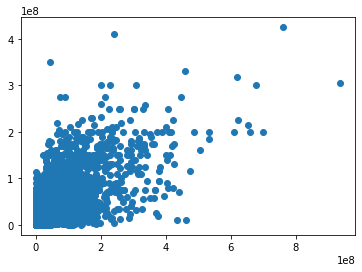

In [194]:
plt.scatter(df_imdb_and_budget['domestic_gross'], df_imdb_and_budget['production_budget'])


In [195]:
df_imdb_ratings_filtered.shape


(28753, 3)

In [196]:
df_imdb_ratings_and_budget = pd.merge(df_imdb_ratings_filtered, df_imdb_and_budget, how = "right", 
                              on ='tconst')
df_imdb_ratings_and_budget.shape

(5234, 37)

In [197]:
#now make a dataframe that is all inner joins
df_imdb_and_budget_inner = pd.merge(tnmovie_budgets, df_imdb_title, how = "inner", 
                              left_on = 'movie', right_on = 'primary_title')
df_imdb_and_budget_inner.shape

(2047, 35)

In [198]:
df_imdb_ratings_and_budget_inner = pd.merge(df_imdb_ratings_filtered, df_imdb_and_budget, how = "inner", 
                              on ='tconst')
df_imdb_ratings_and_budget_inner.shape

(1526, 37)

In [199]:
df_imdb_ratings_and_budget_inner.head(15)

,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,History,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV
0,tt1043726,4.2,50352,42,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319.0,18.848538,...,False,False,False,False,False,False,False,False,False,False
1,tt1094666,7.0,1613,50,"Mar 21, 2008",The Hammer,850000,442638,442638.0,0.442638,...,False,False,False,False,False,False,False,True,False,False
2,tt1171222,5.1,8296,38,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836.0,21.569509,...,False,False,False,False,False,False,False,False,False,False
3,tt1210166,7.6,326657,15,"Sep 23, 2011",Moneyball,50000000,75605492,111300835.0,75.605492,...,False,False,False,False,False,False,False,True,False,False
4,tt1212419,6.5,87288,61,"Oct 15, 2010",Hereafter,50000000,32746941,108660270.0,32.746941,...,False,False,False,True,False,False,False,False,False,False
5,tt1232829,7.2,477771,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429.0,138.447667,...,False,False,False,False,False,False,False,False,False,False
6,tt1243974,5.4,54646,3,"May 29, 2015",Aloha,37000000,21052030,25387091.0,21.052030,...,False,False,False,True,False,False,False,False,False,False
7,tt1261945,4.4,69199,16,"May 27, 2010",Sex and the City 2,95000000,95347692,294680778.0,95.347692,...,False,False,False,True,False,False,False,False,False,False
8,tt1270761,5.6,44490,43,"Aug 26, 2011",Don't Be Afraid of the Dark,25000000,24046682,39126427.0,24.046682,...,False,False,False,False,False,False,False,False,False,False
9,tt1499658,6.9,398695,34,"Jul 8, 2011",Horrible Bosses,35000000,117538559,212417601.0,117.538559,...,False,False,False,False,False,False,False,False,False,False


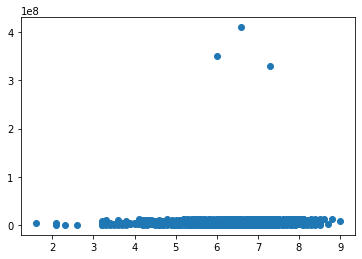

In [200]:
plt.scatter(df_imdb_ratings_and_budget['averagerating'], df_imdb_and_budget['production_budget'])


In [201]:
df_imdb_ratings_and_budget.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year
count,1526.000000,1.526000e+03,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000,2047.000000
mean,6.341874,1.098556e+05,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480,2014.131412
std,1.000444,1.633804e+05,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481,2.716811
min,1.600000,1.010000e+02,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100,2010.000000
25%,5.800000,1.144325e+04,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000,2012.000000
50%,6.400000,5.318500e+04,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000,2014.000000
75%,7.000000,1.338635e+05,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000,2016.000000
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000


In [202]:
#df_imdb_ratings_and_budget['wprofit']=df_imdb_ratings_and_budget.apply(lambda row: row['worldwide_gross'] - row['production_budget'], axis =1)
#worldwide gross - budget
difference = df_imdb_ratings_and_budget['worldwide_gross'] - df_imdb_ratings_and_budget['production_budget']
df_imdb_ratings_and_budget['w_roi']=difference/df_imdb_ratings_and_budget['production_budget']
df_imdb_ratings_and_budget.head()

,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV,w_roi
0,tt1775309,NaN,NaN,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,...,False,False,False,False,False,False,False,False,False,5.532577
1,tt1298650,6.6,447624.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,241.063875,...,False,False,False,False,False,False,False,False,False,1.546673
2,tt6565702,6.0,24451.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,42.762350,...,False,True,False,False,False,False,False,False,False,-0.572108
3,tt2395427,7.3,665594.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,459.005868,...,False,True,False,False,False,False,False,False,False,3.243841
4,NaN,NaN,NaN,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,620.181382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153696


In [203]:
#calculate values for genres
genre_statistics = {}
for genre in unique_genres:
    tempdf = df_imdb_ratings_and_budget.loc[df_imdb_ratings_and_budget[genre] == True]
    productionbudgmed = tempdf['production_budget'].median()/1000000
    productionbudmean = tempdf['production_budget'].mean()/1000000
    domestic_grossmed = tempdf['domestic_gross'].median()/1000000
    domestic_grossmean = tempdf['domestic_gross'].mean()/1000000
    world_grossmed = tempdf['worldwide_gross'].median()/1000000
    world_grossmean = tempdf['worldwide_gross'].mean()/1000000
    average_ratingmean = tempdf['averagerating'].mean()
    numvotes_count = tempdf['numvotes'].sum()
    w_roi_mean = tempdf['w_roi'].mean()
    w_roi_med = tempdf['w_roi'].median()
    genre_entry = {'genre_name': genre, 'productionbudgmed': productionbudgmed, 'productionbudmean': productionbudmean,
                   'domestic_grossmed':domestic_grossmed, 'domestic_grossmean': domestic_grossmean,
                   'world_grossmed': world_grossmed, 'world_grossmean': world_grossmean, 
                   'average_rating': average_ratingmean, 'numvotes_count': numvotes_count, 'w_roi_mean': w_roi_mean,
                   'w_roi_med': w_roi_med}
    genre_statistics[genre] = genre_entry
    
del genre_statistics['Reality-TV']
genre_statistics

#add w_roi and average rating 

{'Action': {'genre_name': 'Action',
  'productionbudgmed': 53.012938,
  'productionbudmean': 76.73234007835052,
  'domestic_grossmed': 46.874505,
  'domestic_grossmean': 85.99055569690722,
  'world_grossmed': 109.73884,
  'world_grossmean': 230.40528435051544,
  'average_rating': 6.343822843822842,
  'numvotes_count': 79071466.0,
  'w_roi_mean': 2.4321390416492283,
  'w_roi_med': 1.211550170940171},
 'Crime': {'genre_name': 'Crime',
  'productionbudgmed': 25.0,
  'productionbudmean': 30.74758946062992,
  'domestic_grossmed': 20.3361375,
  'domestic_grossmean': 34.7774529488189,
  'world_grossmed': 36.8907625,
  'world_grossmean': 77.17808907086614,
  'average_rating': 6.411555555555557,
  'numvotes_count': 24594590.0,
  'w_roi_mean': 1.5892267539732166,
  'w_roi_med': 0.6637852166666667},
 'Drama': {'genre_name': 'Drama',
  'productionbudgmed': 15.0,
  'productionbudmean': 25.99286503036437,
  'domestic_grossmed': 16.928415,
  'domestic_grossmean': 33.71926440890689,
  'world_grossmed'

In [204]:
#df_imdb_ratings_and_budget['highbudget'] = df_imdb_ratings_and_budget['production_budget'] >= 1000000
#df_imdb_ratings_and_budget['highestbudget'] = df_imdb_ratings_and_budget['production_budget'] >= 10000000
#boxplot = sns.boxplot(data=df_imdb_ratings_and_budget[df_imdb_ratings_and_budget['wprofitmargin'] & (df_imdb_ratings_and_budget['highbudget'])])

df_imdb_ratings_and_budget_mil = df_imdb_ratings_and_budget[df_imdb_ratings_and_budget['production_budget'] >= 1000000]
df_imdb_ratings_and_budget_tenmil = df_imdb_ratings_and_budget[df_imdb_ratings_and_budget['production_budget'] >= 10000000]


In [205]:
df_imdb_ratings_and_budget.describe()



,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1526.000000,1.526000e+03,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5234.000000,5234.000000,2047.000000,5234.000000
mean,6.341874,1.098556e+05,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,46.257466,100.761506,34.033480,2014.131412,4.267876
std,1.000444,1.633804e+05,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,70.296510,181.122645,42.960481,2.716811,30.997659
min,1.600000,1.010000e+02,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000388,0.000401,0.001100,2010.000000,-0.999875
25%,5.800000,1.144325e+04,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,4.289719,8.142571,6.500000,2012.000000,-0.241161
50%,6.400000,5.318500e+04,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,21.984223,35.438436,20.000000,2014.000000,0.961653
75%,7.000000,1.338635e+05,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,57.565980,109.335661,45.000000,2016.000000,3.059457
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,1799.000000


In [206]:
df_imdb_ratings_and_budget_mil.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1461.000000,1.461000e+03,4930.000000,4.930000e+03,4.930000e+03,4.930000e+03,4930.000000,4930.000000,4930.000000,1944.000000,4930.000000
mean,6.355168,1.139224e+05,50.413996,3.610936e+07,4.881030e+07,1.065073e+08,48.810302,106.507306,36.109359,2014.157922,2.629089
std,0.989387,1.656826e+05,28.984483,4.341911e+07,7.154558e+07,1.849711e+08,71.545580,184.971136,43.419113,2.728825,7.221113
min,1.600000,1.010000e+02,1.000000,1.000000e+06,3.880000e+02,6.730000e+02,0.000388,0.000673,1.000000,2010.000000,-0.999875
25%,5.800000,1.310900e+04,25.000000,8.500000e+06,6.000000e+06,1.073222e+07,6.000000,10.732225,8.500000,2012.000000,-0.211250
50%,6.400000,5.754900e+04,50.000000,2.000000e+07,2.501944e+07,3.968656e+07,25.019438,39.686557,20.000000,2014.000000,0.957011
75%,7.100000,1.401480e+05,76.000000,4.600000e+07,6.046695e+07,1.185319e+08,60.466949,118.531902,46.000000,2016.000000,2.918460
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,224.000000


In [207]:
df_imdb_ratings_and_budget_tenmil.describe()

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,worldwide_gross_mil,production_budget_mil,start_year,w_roi
count,1118.000000,1.118000e+03,3614.000000,3.614000e+03,3.614000e+03,3.614000e+03,3614.000000,3614.000000,3614.000000,1472.000000,3614.000000
mean,6.383363,1.351247e+05,50.548423,4.765514e+07,6.180905e+07,1.375946e+08,61.809049,137.594638,47.655137,2014.224185,1.930864
std,0.959712,1.796569e+05,28.998855,4.549935e+07,7.834526e+07,2.060247e+08,78.345259,206.024720,45.499352,2.747475,3.810857
min,1.600000,1.010000e+02,1.000000,1.000000e+07,3.880000e+02,5.000000e+03,0.000388,0.005000,10.000000,2010.000000,-0.999808
25%,5.800000,2.335125e+04,25.000000,1.800000e+07,1.435937e+07,2.357830e+07,14.359374,23.578304,18.000000,2012.000000,-0.122192
50%,6.400000,7.751200e+04,50.000000,3.000000e+07,3.737273e+07,6.510591e+07,37.372729,65.105910,30.000000,2014.000000,0.946977
75%,7.100000,1.754232e+05,76.000000,6.000000e+07,7.619743e+07,1.629818e+08,76.197431,162.981816,60.000000,2016.250000,2.613430
max,9.000000,1.841066e+06,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,936.662225,2776.345279,425.000000,2020.000000,74.520507


<AxesSubplot:xlabel='production_budget_mil', ylabel='domestic_gross_mil'>

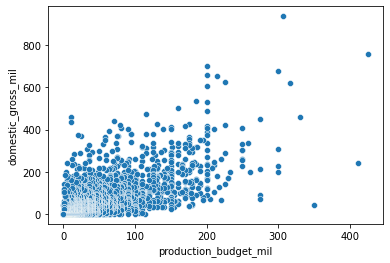

In [210]:
sns.scatterplot(data = df_imdb_ratings_and_budget, x="production_budget_mil", y="domestic_gross_mil")

#graphs production budget and domsetic gross, all in terms of millions 

<AxesSubplot:xlabel='production_budget_mil', ylabel='domestic_gross_mil'>

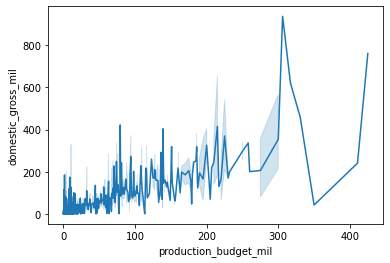

In [211]:
sns.lineplot(data=df_imdb_ratings_and_budget, x="production_budget_mil", y="domestic_gross_mil")

Text(0, 0.5, 'Worldwide Gross in Millions')

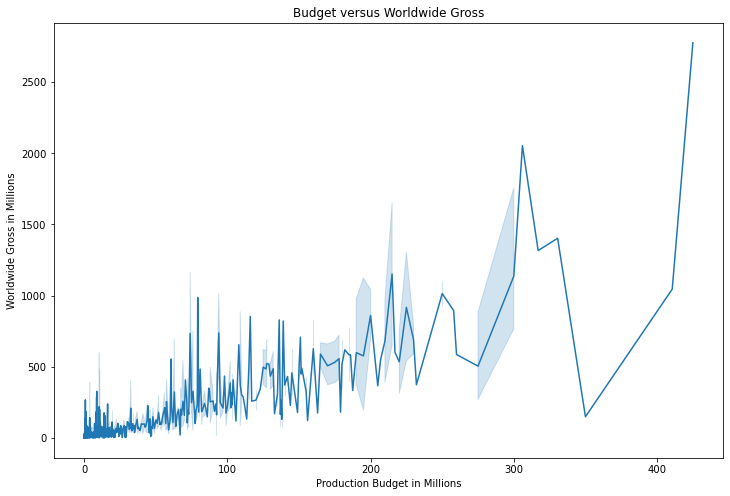

In [212]:
#genre_production_budget=df_imdb_ratings_and_budget.pivot("domestic_gross_mil", unique_genres, "production_budget_mil")
#sns.lineplot(data=)
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data=df_imdb_ratings_and_budget, x="production_budget_mil", y="worldwide_gross_mil")
plt.title('Budget versus Worldwide Gross')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Gross in Millions')

<AxesSubplot:xlabel='production_budget_mil', ylabel='worldwide_gross_mil'>

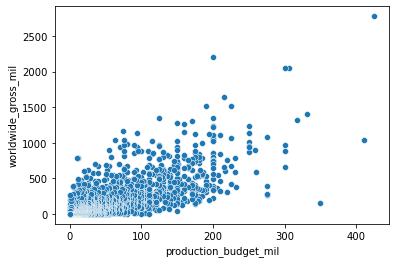

In [213]:
sns.scatterplot(data=df_imdb_ratings_and_budget, x="production_budget_mil", y = "worldwide_gross_mil")

In [214]:
genre_statistics

{'Action': {'genre_name': 'Action',
  'productionbudgmed': 53.012938,
  'productionbudmean': 76.73234007835052,
  'domestic_grossmed': 46.874505,
  'domestic_grossmean': 85.99055569690722,
  'world_grossmed': 109.73884,
  'world_grossmean': 230.40528435051544,
  'average_rating': 6.343822843822842,
  'numvotes_count': 79071466.0,
  'w_roi_mean': 2.4321390416492283,
  'w_roi_med': 1.211550170940171},
 'Crime': {'genre_name': 'Crime',
  'productionbudgmed': 25.0,
  'productionbudmean': 30.74758946062992,
  'domestic_grossmed': 20.3361375,
  'domestic_grossmean': 34.7774529488189,
  'world_grossmed': 36.8907625,
  'world_grossmean': 77.17808907086614,
  'average_rating': 6.411555555555557,
  'numvotes_count': 24594590.0,
  'w_roi_mean': 1.5892267539732166,
  'w_roi_med': 0.6637852166666667},
 'Drama': {'genre_name': 'Drama',
  'productionbudgmed': 15.0,
  'productionbudmean': 25.99286503036437,
  'domestic_grossmed': 16.928415,
  'domestic_grossmean': 33.71926440890689,
  'world_grossmed'

In [215]:
dfgenre = pd.DataFrame(genre_statistics)
print(dfgenre)

                         Action        Crime        Drama    Biography  \
genre_name               Action        Crime        Drama    Biography   
productionbudgmed       53.0129           25           15           17   
productionbudmean       76.7323      30.7476      25.9929      24.1608   
domestic_grossmed       46.8745      20.3361      16.9284      18.3352   
domestic_grossmean      85.9906      34.7775      33.7193      38.4346   
world_grossmed          109.739      36.8908      28.9695      29.8904   
world_grossmean         230.405      77.1781       70.122      77.4978   
average_rating          6.34382      6.41156      6.55755      6.96324   
numvotes_count      7.90715e+07  2.45946e+07  6.93052e+07  1.33536e+07   
w_roi_mean              2.43214      1.58923      2.80726      4.87455   
w_roi_med               1.21155     0.663785     0.811882     0.869873   

                         Comedy      Fantasy       Horror     Thriller  \
genre_name               Comedy      

In [217]:
print(dfgenre.transpose())

              genre_name productionbudgmed productionbudmean  \
Action            Action           53.0129           76.7323   
Crime              Crime                25           30.7476   
Drama              Drama                15           25.9929   
Biography      Biography                17           24.1608   
Comedy            Comedy                25           38.4094   
Fantasy          Fantasy                51           79.6987   
Horror            Horror                10           23.1017   
Thriller        Thriller                20           32.4469   
Adventure      Adventure                90           102.009   
Animation      Animation                80           93.2481   
Documentary  Documentary                13           25.3566   
History          History                20           29.9366   
Mystery          Mystery                14           25.5171   
Sci-Fi            Sci-Fi                40           83.1759   
Romance          Romance                

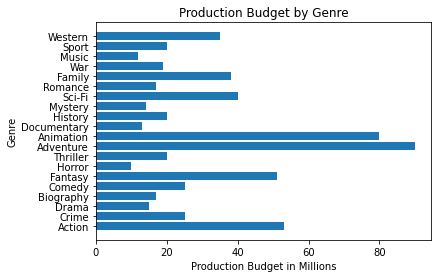

In [218]:
dfgenretransposed = dfgenre.transpose()
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['productionbudgmed'])
plt.title('Production Budget by Genre')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Genre')
plt.show()

Text(0, 0.5, 'Domestic Gross Median in Millions')

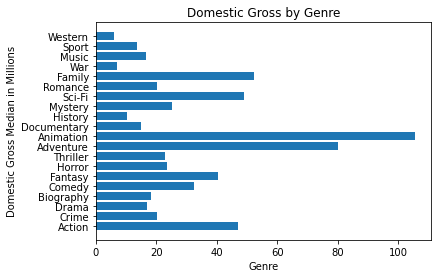

In [219]:
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['domestic_grossmed'])
plt.title('Domestic Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross Median in Millions')

Text(0, 0.5, 'World Gross Median in Millions')

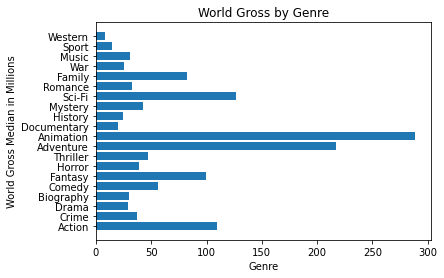

In [220]:
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['world_grossmed'])
plt.title('World Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('World Gross Median in Millions')

Text(0, 0.5, 'in Millions')

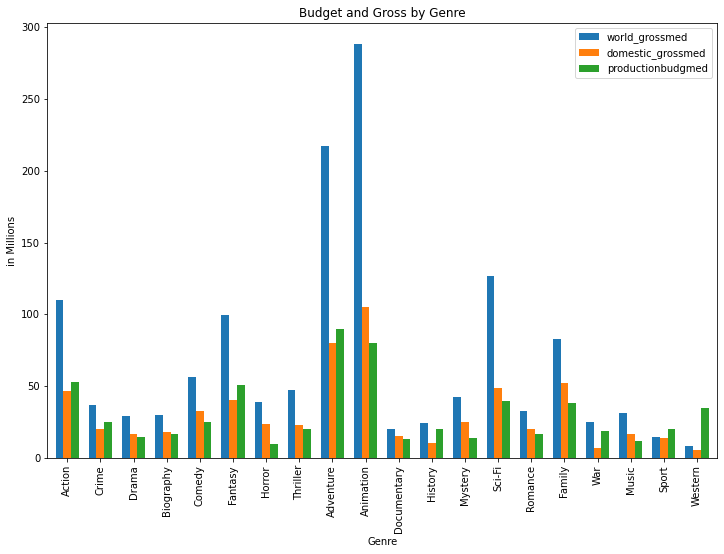

In [221]:
#fig, ax1 =pyplot.subplots(figsize=(10,10))
dfgenretransposed.plot(x="genre_name", y=["world_grossmed", "domestic_grossmed", "productionbudgmed"], kind = "bar", width = .7, figsize = (12,8))
plt.title('Budget and Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('in Millions')

Takeaways: 
Adventure, Animation, Sci-Fi are he top 3 in terms of world gross; 
Actiono also good because world gross is almost double budget, fantasy also contender

sty away from westrn, sport

**Oher takeaway - horror, small budget and the wrld and domestic gross return is very high 

In [222]:
#df_imdb_ratings_and_budget['w_roi']=difference/df_imdb_ratings_and_budget['production_budget']
df_imdb_ratings_and_budget.head()

,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV,w_roi
0,tt1775309,NaN,NaN,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,760.507625,...,False,False,False,False,False,False,False,False,False,5.532577
1,tt1298650,6.6,447624.0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,241.063875,...,False,False,False,False,False,False,False,False,False,1.546673
2,tt6565702,6.0,24451.0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,42.762350,...,False,True,False,False,False,False,False,False,False,-0.572108
3,tt2395427,7.3,665594.0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,459.005868,...,False,True,False,False,False,False,False,False,False,3.243841
4,NaN,NaN,NaN,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,620.181382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153696


In [223]:
def onegenredf(genre):
    temp = df_imdb_ratings_and_budget[df_imdb_ratings_and_budget[genre]==True]
    return temp

In [224]:
onegenredf("Mystery").head()


,tconst,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_mil,...,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Reality-TV,w_roi
3251,tt1856101,8.0,376241.0,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408.0,92.054159,...,True,True,False,False,False,False,False,False,False,0.401932
3358,tt0944835,6.4,277204.0,50,"Jul 23, 2010",Salt,130000000,118311368,290650494.0,118.311368,...,True,False,False,False,False,False,False,False,False,1.235773
3376,tt1446714,7.0,538720.0,75,"Jun 8, 2012",Prometheus,125000000,126477084,402448265.0,126.477084,...,True,True,False,False,False,False,False,False,False,2.219586
3379,tt1386703,6.3,228460.0,79,"Aug 3, 2012",Total Recall,125000000,58877969,211856088.0,58.877969,...,True,False,False,False,False,False,False,False,False,0.694849
3380,tt1386703,6.3,228460.0,80,"Jun 1, 1990",Total Recall,65000000,119394839,261400000.0,119.394839,...,True,False,False,False,False,False,False,False,False,3.021538


In [225]:
onegenredf("Mystery").head()

dataframelist = []
for genre in unique_genres:
    dataframelist.append(onegenredf(genre))


In [227]:
#for item in dataframelist: 
 #   fig, axes = plt.subplots()
    
genre_statistics

{'Action': {'genre_name': 'Action',
  'productionbudgmed': 53.012938,
  'productionbudmean': 76.73234007835052,
  'domestic_grossmed': 46.874505,
  'domestic_grossmean': 85.99055569690722,
  'world_grossmed': 109.73884,
  'world_grossmean': 230.40528435051544,
  'average_rating': 6.343822843822842,
  'numvotes_count': 79071466.0,
  'w_roi_mean': 2.4321390416492283,
  'w_roi_med': 1.211550170940171},
 'Crime': {'genre_name': 'Crime',
  'productionbudgmed': 25.0,
  'productionbudmean': 30.74758946062992,
  'domestic_grossmed': 20.3361375,
  'domestic_grossmean': 34.7774529488189,
  'world_grossmed': 36.8907625,
  'world_grossmean': 77.17808907086614,
  'average_rating': 6.411555555555557,
  'numvotes_count': 24594590.0,
  'w_roi_mean': 1.5892267539732166,
  'w_roi_med': 0.6637852166666667},
 'Drama': {'genre_name': 'Drama',
  'productionbudgmed': 15.0,
  'productionbudmean': 25.99286503036437,
  'domestic_grossmed': 16.928415,
  'domestic_grossmean': 33.71926440890689,
  'world_grossmed'

(Text(0, 0.5, 'Median Worldwide Return on Investment (Millions)'),)

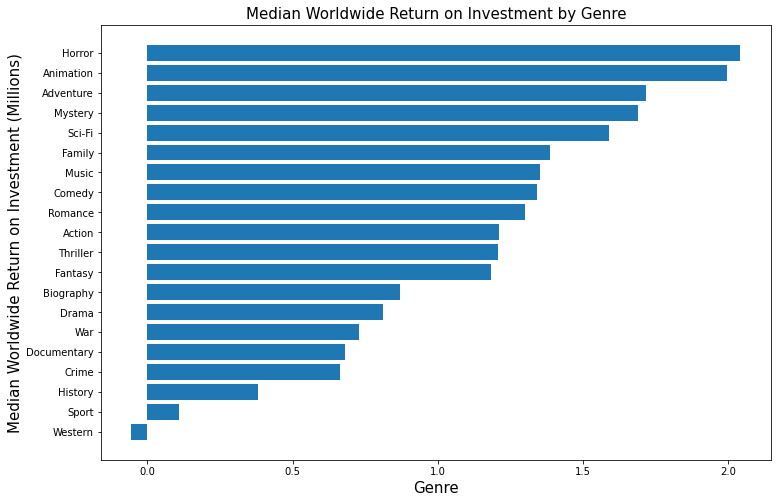

In [228]:
plt.figure(figsize=(12,8))
dfgenretransposed = dfgenretransposed.sort_values(by=['w_roi_med'])
plt.barh(dfgenretransposed['genre_name'], dfgenretransposed['w_roi_med'])
plt.title('Median Worldwide Return on Investment by Genre', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Median Worldwide Return on Investment (Millions)', fontsize = 15), 

Text(0, 0.5, 'Median Worldwide Return on Investment Millions')

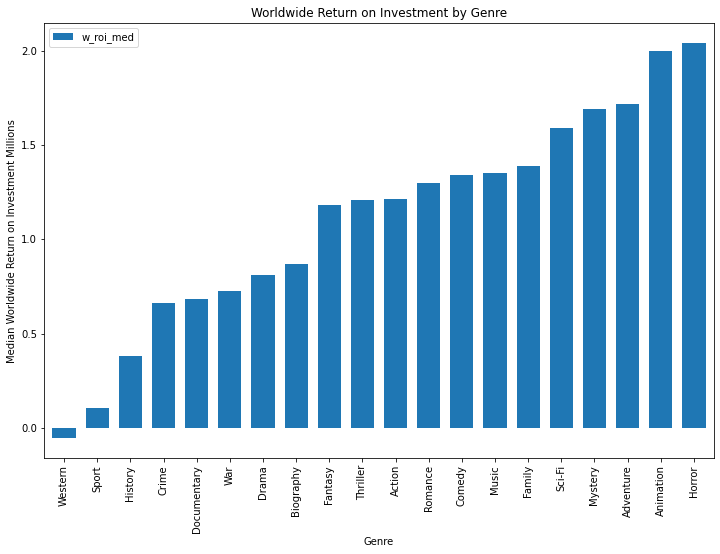

In [229]:
dfgenretransposed = dfgenretransposed.sort_values(by=['w_roi_med'])
dfgenretransposed.plot(x="genre_name", y="w_roi_med", kind = "bar", width = .7, figsize = (12,8))
plt.title('Worldwide Return on Investment by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Worldwide Return on Investment Millions')

Text(0, 0.5, 'Average Rating')

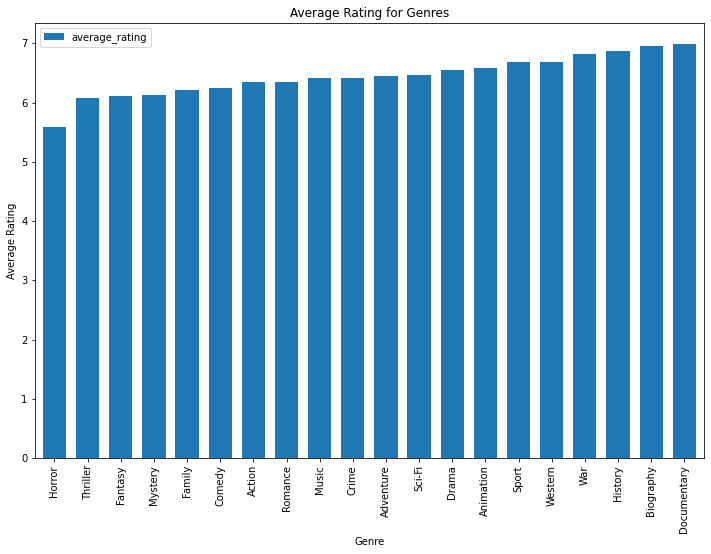

In [230]:
dfgenretransposed = dfgenretransposed.sort_values(by=['average_rating'])
dfgenretransposed.plot(x="genre_name", y='average_rating', kind = "bar", width = .7, figsize = (12,8))
plt.title('Average Rating for Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')


Text(0, 0.5, 'Number of Reviewers')

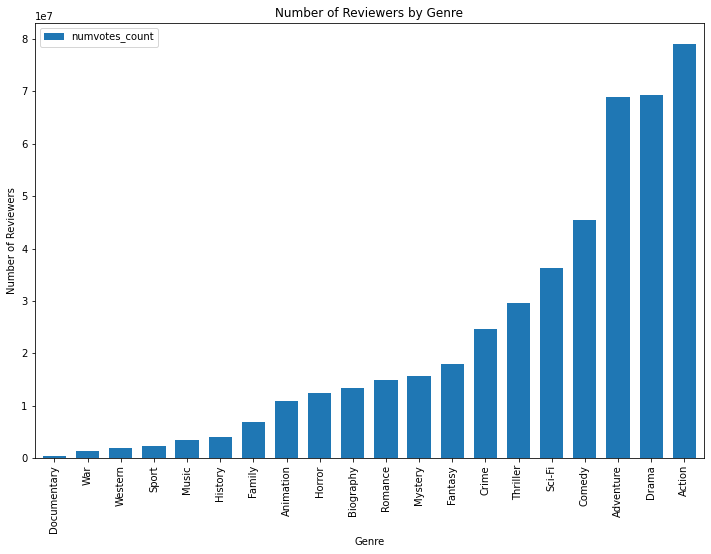

In [231]:
dfgenretransposed = dfgenretransposed.sort_values(by=['numvotes_count'])
dfgenretransposed.plot(x="genre_name", y='numvotes_count', kind = "bar", width = .7, figsize = (12,8))
plt.title('Number of Reviewers by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviewers')